# Introduction to prophet library with code
source: https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

**Prophet is an additive regression model with a piecewise linear or logistic growth curve trend. It includes a yearly seasonal component modeled using Fourier series and a weekly seasonal component modeled using dummy variables.**

## imports libraries

In [9]:
import fbprophet
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

## loads data

In [2]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

## shape of data

In [3]:
print(df.shape)

(108, 2)


## shows first 5 rows

In [4]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


## plots the time series

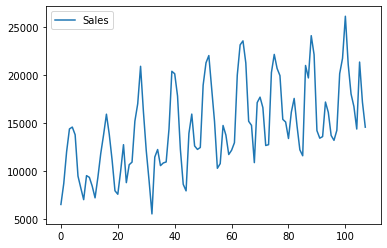

In [6]:
df.plot()
plt.show()

## preprocesses data

In [7]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

## uses prophet model
fit parameters
- interval_width - the width of the uncertainty intervals (by default 80%) in trend
- mcmc.samples - set uncertainty (by default to 0) in seasonality (full Bayesian sampling) 


predict parameters
- freq - set frequency of data (eg. daily ('D'), hourly ('H'), monthly ('M')
- period - number of samples to predict in the future 

In [10]:
clf = Prophet(interval_width=0.95)
clf.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = clf.make_future_dataframe(periods=12, freq='M')
forecast = clf.predict(future)

In [12]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,9576.987490,3722.706023,8671.482952,9576.987490,9576.987490,-3460.470406,-3460.470406,-3460.470406,-3460.470406,-3460.470406,-3460.470406,0.0,0.0,0.0,6116.517085
1,1960-02-01,9681.334268,4327.976391,9037.636390,9681.334268,9681.334268,-2954.172569,-2954.172569,-2954.172569,-2954.172569,-2954.172569,-2954.172569,0.0,0.0,0.0,6727.161700
2,1960-03-01,9778.948996,10434.979383,15225.083072,9778.948996,9778.948996,2943.134086,2943.134086,2943.134086,2943.134086,2943.134086,2943.134086,0.0,0.0,0.0,12722.083082
3,1960-04-01,9883.295774,12363.086104,17017.965042,9883.295774,9883.295774,4914.628467,4914.628467,4914.628467,4914.628467,4914.628467,4914.628467,0.0,0.0,0.0,14797.924241
4,1960-05-01,9984.276526,13875.746073,18660.238726,9984.276526,9984.276526,6158.806964,6158.806964,6158.806964,6158.806964,6158.806964,6158.806964,0.0,0.0,0.0,16143.083490


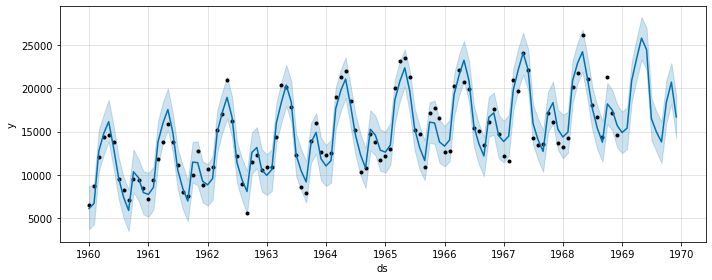

In [13]:
# confidence interval with prediction of future data (from 1969 year)
fig = clf.plot(forecast, figsize=(10,4))